In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
order_data = pd.read_csv("/content/blinkit_orders.csv")
print(order_data)

        order_id  customer_id           order_date promised_delivery_time  \
0     1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1     1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2     9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3     9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4     5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   
...          ...          ...                  ...                    ...   
4995  1669690997     62600289  2023-12-25 15:46:20    2023-12-25 16:05:20   
4996  8340761903     53640286  2023-11-27 09:18:43    2023-11-27 09:38:43   
4997  5936301790     87059497  2024-06-21 19:09:09    2024-06-21 19:23:09   
4998  5710579377     67310893  2024-06-06 14:58:13    2024-06-06 15:12:13   
4999  2494813730     28663279  2023-08-23 12:04:18    2023-08-23 12:20:18   

     actual_delivery_time delivery_status  order_total payment_method  \
0 

In [ ]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [ ]:
from collections import OrderedDict
OrderedDict(order_data.isnull().sum())

OrderedDict([('order_id', 0),
             ('customer_id', 0),
             ('order_date', 0),
             ('promised_delivery_time', 0),
             ('actual_delivery_time', 0),
             ('delivery_status', 0),
             ('order_total', 0),
             ('payment_method', 0),
             ('delivery_partner_id', 0),
             ('store_id', 0)])

In [ ]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
order_data['promised_delivery_time'] = pd.to_datetime(order_data['promised_delivery_time'])
order_data['actual_delivery_time'] = pd.to_datetime(order_data['actual_delivery_time'])


In [ ]:
order_data['delivery_delay_minutes'] = (
    order_data['actual_delivery_time'] - order_data['promised_delivery_time']
).dt.total_seconds() / 60

In [ ]:
order_data['is_late'] = order_data['delivery_delay_minutes'] > 0

In [ ]:
order_data['order_day'] = order_data['order_date'].dt.day_name()
order_data['order_hour'] = order_data['order_date'].dt.hour

In [ ]:
order_data[['order_id', 'order_date', 'promised_delivery_time', 'actual_delivery_time',
            'delivery_delay_minutes', 'is_late', 'order_day', 'order_hour']].head()

,order_id,order_date,promised_delivery_time,actual_delivery_time,delivery_delay_minutes,is_late,order_day,order_hour
0,1961864118,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,False,Wednesday,8
1,1549769649,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,True,Tuesday,13
2,9185164487,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,True,Monday,13
3,9644738826,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,False,Friday,16
4,5427684290,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,True,Monday,5


In [ ]:
late_percentage = order_data['is_late'].mean() * 100

In [ ]:
average_late_delay = order_data.loc[order_data['is_late'], 'delivery_delay_minutes'].mean()

In [ ]:
busiest_day = order_data['order_day'].value_counts().idxmax()

In [ ]:
busiest_hour = order_data['order_hour'].value_counts().idxmax()

In [ ]:
total_revenue = order_data['order_total'].sum()
average_order_value = order_data['order_total'].mean()


In [ ]:
print(f" Late Delivery Percentage: {late_percentage:.2f}%")
print(f" Average Delay (minutes): {average_late_delay:.2f}")
print(f" Busiest Order Day: {busiest_day}")
print(f" Busiest Order Hour: {busiest_hour}:00")
print(f" Total Revenue: ₹{total_revenue:.2f}")
print(f" Average Order Value: ₹{average_order_value:.2f}")

 Late Delivery Percentage: 61.96%
 Average Delay (minutes): 8.69
 Busiest Order Day: Wednesday
 Busiest Order Hour: 8:00
 Total Revenue: ₹11009308.50
 Average Order Value: ₹2201.86


In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<ipython-input-26-a1020557c1b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_data, x='is_late', palette='Set2')


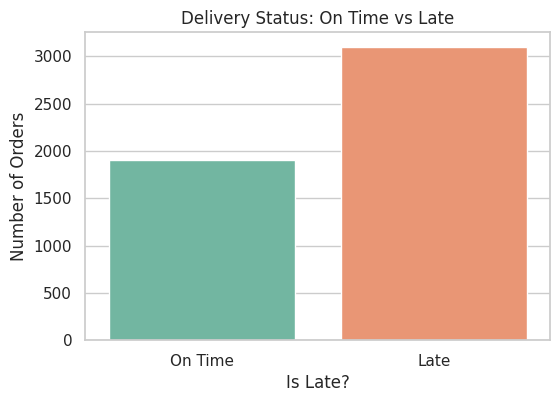

In [ ]:
# 1.  Late vs On-Time Deliveries
plt.figure(figsize=(6,4))
sns.countplot(data=order_data, x='is_late', palette='Set2')
plt.title('Delivery Status: On Time vs Late')
plt.xlabel('Is Late?')
plt.ylabel('Number of Orders')
plt.xticks([0,1], ['On Time', 'Late'])
plt.show()

<ipython-input-28-9de39783d157>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_data, x='order_day', order=[


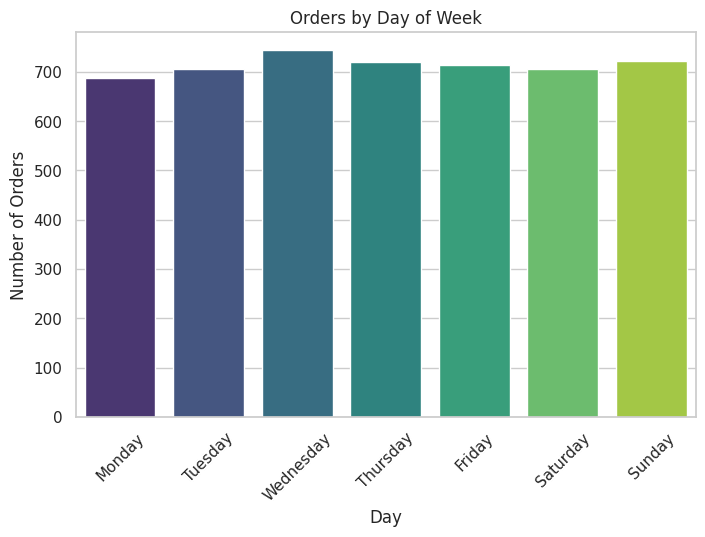

In [ ]:
# 2.Orders by Day of Week
plt.figure(figsize=(8,5))
sns.countplot(data=order_data, x='order_day', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Orders by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-37e408a3c49b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=order_data, x='order_hour', y='order_id', estimator='count', ci=None, marker='o')


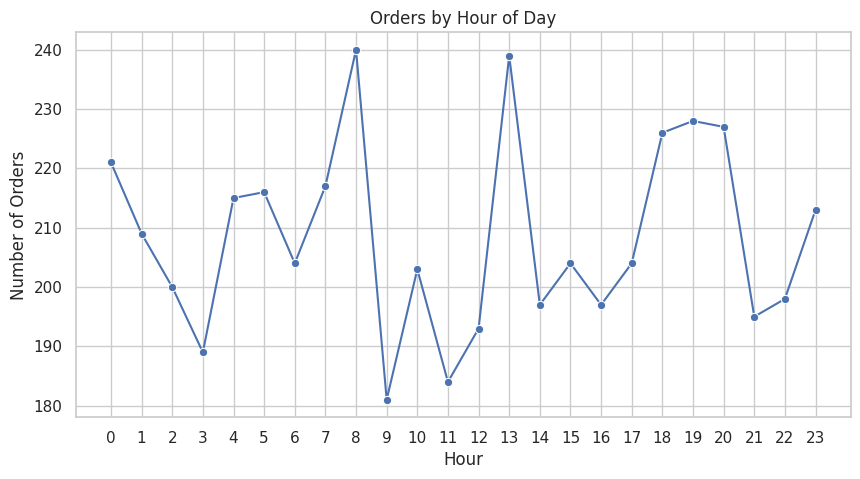

In [ ]:
# 3. Orders by Hour of Day
plt.figure(figsize=(10,5))
sns.lineplot(data=order_data, x='order_hour', y='order_id', estimator='count', ci=None, marker='o')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

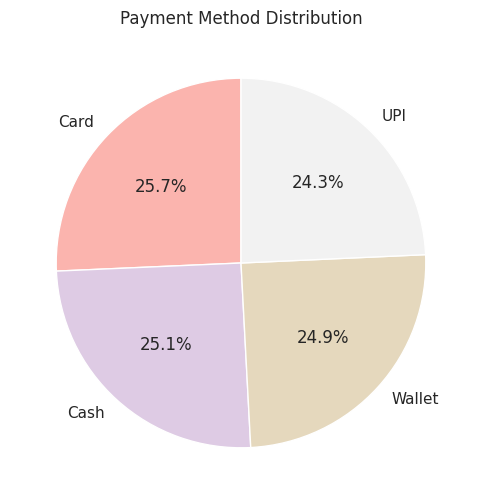

In [ ]:
# 4. Payment Method Distribution
plt.figure(figsize=(6,6))
order_data['payment_method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

<ipython-input-32-a2d3992f3cc6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.index.astype(str), y=top_stores.values, palette='coolwarm')


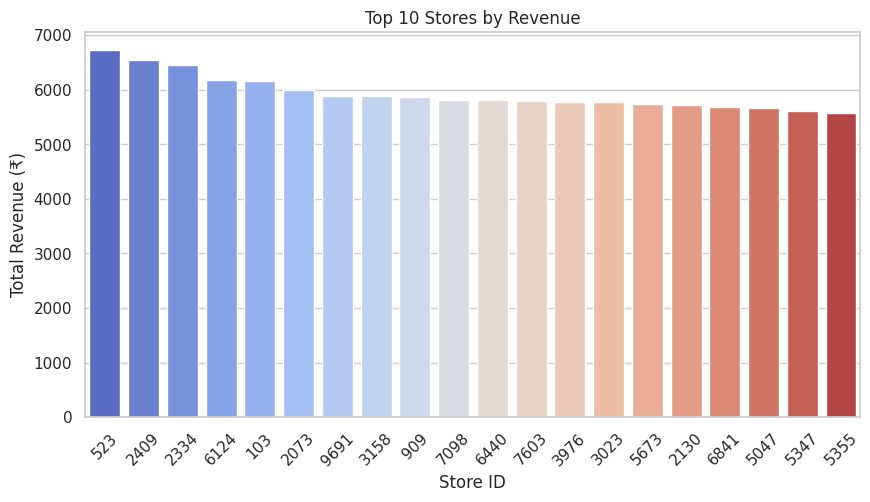

In [ ]:
# 5.Revenue by Store (Top 10)
plt.figure(figsize=(10,5))
top_stores = order_data.groupby('store_id')['order_total'].sum().sort_values(ascending=False).head(20)
sns.barplot(x=top_stores.index.astype(str), y=top_stores.values, palette='coolwarm')
plt.title('Top 10 Stores by Revenue')
plt.xlabel('Store ID')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 1:Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Select features and target
features = ['order_hour', 'order_day', 'store_id', 'payment_method']
target = 'is_late'

df_model = order_data[features + [target]].copy()

# Step 3: Encode categorical variables
label_encoders = {}
for col in ['order_day', 'payment_method']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Step 4: Train-test split
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy:", round(accuracy * 100, 2), "%")

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


 Accuracy: 54.8 %

 Classification Report:

              precision    recall  f1-score   support

       False       0.39      0.31      0.34       386
        True       0.62      0.70      0.65       614

    accuracy                           0.55      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.53      0.55      0.54      1000


 Confusion Matrix:

[[119 267]
 [185 429]]


<ipython-input-40-256d2f90317f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='coolwarm')


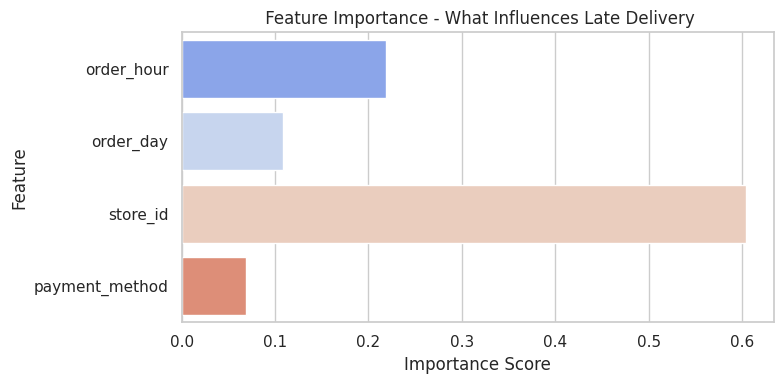

In [ ]:
# Get feature importances from the trained Random Forest
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names, palette='coolwarm')
plt.title(' Feature Importance - What Influences Late Delivery')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

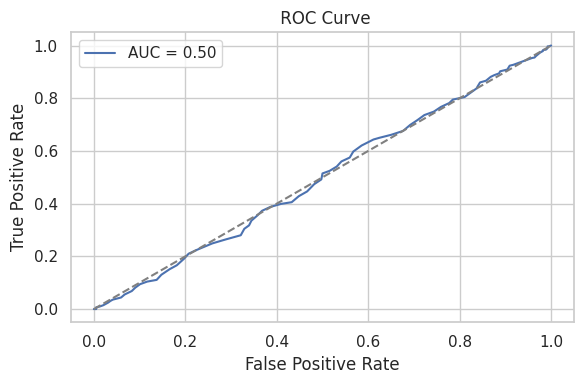

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(' ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(" Cross-Validation Accuracy Scores:", cv_scores)
print(" Average CV Accuracy:", round(cv_scores.mean() * 100, 2), "%")

 Cross-Validation Accuracy Scores: [0.535 0.55  0.544 0.532 0.542]
 Average CV Accuracy: 54.06 %
